In [13]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

import string
import numpy as np

In [14]:
#We use a dataset of 50,000 movies reviews from IMDB.  
#The dataset is divided into 25,000 reviews for training (x_train) and 25,000 reviews for testing (x_test)
#and labeled by sentiment (positive 1/negative 0) (y_train and y_test).
#Reviews have been preprocessed. Each review is encoded as a list of word indexes (integers). 
#Indexes are stored in the dictionary - words in all 50,000 reviews have been mapping to integers 
#indicating the words' relative frequency of occurrence. Each word is assigned a unique integer. 
#For example the integer "3" encodes the 3rd most frequent word in the data.

top_words = 10000 #Show only 10000 most frequent words. 
#It doesn't reduce the size of the dictionary, but it restricts the range of integers used to encode the reviews.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

In [15]:
#For example - the variable named x_train is a list of 25,000 lists.
#Each of inner lists represents one movie review.
#Inner lists don't contain words; they contain integers.
#Why? We can't train a neural network with text.
#We have to use numbers, specifically tensors.
#Here each review is a 1-dimensional tensor (1-dimensional array).
#Below an inner list describes the first review in the training set.
#The first number in the list — 1 — doesn't represent a word at all. 
#It marks the start of the review and is the same for every review in the dataset. 
#The numbers 0 and 2 are reserved as well, so it is necessary to subtract 3 
#from the other numbers to map an integer in a review to the corresponding integer in the dictionary.
#For example - the second number — 14 — references the word that corresponds to the number 11 in the dictionary.
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [16]:
#Code to receive the word index dictionary. Keys are word strings, values are their index.
#The dictionary contains more than 88,000 words and the integers that correspond to them.

imdb.get_word_index()

1646592/1641221 [==============================] - 1s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [27]:
#We can reverse-encode a review.
#Code to show the first review in x_train in textual format.
#The review is clean - it means that all etters have been converted to lowercase and punctuation characters removed

word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start of the review
word_dict['?'] = 2 # Unknown word (words that aren't among the most common 10,000 words in the dataset)
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

                                                                                                                                                                                                                                                                                          > this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that pla

In [17]:
#Each review has a different lenght. To train a neural network
#each tensor needs to be the same length.
#Function below takes a list of lists as input and converts the inner lists 
#to a specified length by truncating them if necessary or padding them with 0s. 

max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [19]:
embedding_vector_length = 32

#"sequential" model is composed of an end-to-end stack of layers
#in which the output from one layer provides input to the next.
model = Sequential() 

#The next several statements add layers to the model. 
#First is an embedding layer, which is crucial to neural networks that process words.
#The call to Flatten following the addition of the embedding layer reshapes the output for input to the next layer.
#The next three layers added to the model are dense layers, also known as fully connected layers. 
#These are the traditional layers that are common in neural networks. 
#Each layer contains n nodes or neurons, and each neuron receives input from every neuron in the previous layer.
#It is these layers that permit a neural network to "learn" from input data by iteratively guessing at the output,
#checking the results, and fine-tuning the connections to produce better results. 
#The first two dense layers in this network contain 16 neurons each. This number was arbitrarily chosen. 
#The final dense layer contains just one neuron, because the ultimate goal of the network 
#is to predict one output — namely, a sentiment score from 0.0 to 1.0.
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile function "compiles" the model by specifying important parameters such as which optimizer to use 
#and what metrics to use to judge the accuracy of the model in each training step. 
#Training doesn't begin until you call the model's fit function, so the compile call typically executes quickly.
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
#Fit function trains the neural network.
#epochs=2 tells Keras to make 2 forward and backward passes through the model. 
#With each pass, the model learns from the training data and measures ("validates") how well it learned 
#using the test data. Then it makes adjustments and goes back for the next pass or epoch. 
#This is reflected in the output from the fit function, which shows the training accuracy (acc) 
#and validation accuracy (val_acc) for each epoch.

#batch_size=128 tells Keras to use 128 training samples at a time to train the network. 
#Larger batch sizes speed the training time (fewer passes are required in each epoch 
#to consume all of the training data), but smaller batch sizes (for example 32) sometimes increase accuracy.

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=32)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 65s 3ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 1.0824 - val_accuracy: 0.7776
Epoch 2/2
25000/25000 [==============================] - 62s 2ms/step - loss: 0.0514 - accuracy: 0.9815 - val_loss: 0.6154 - val_accuracy: 0.8472


[]

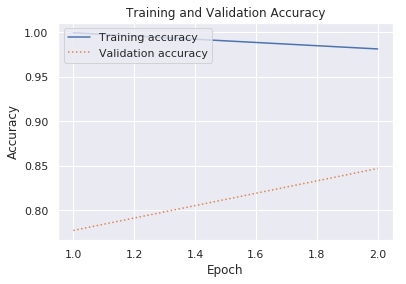

In [36]:
#We have to try to avoid overfitting. You generally don't want to train a model for any longer 
#than is required for these accuracies to stabilize.
#One indication that a model is overfitting is a growing discrepancy 
#between the training accuracy and the validation accuracy.

#The accuracy data comes from the history object returned by the model's fit function. 

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

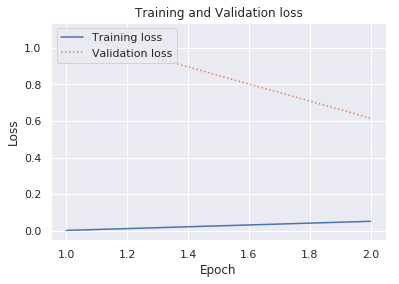

In [37]:
#Another way to check for overfitting is to compare training loss to validation loss as training proceeds. 
#Optimization problems such as this seek to minimize a loss function.
#For a given epoch, training loss, much greater than validation loss, can be evidence of overfitting.

loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, ':', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()

In [38]:
#Evaluate method determines how accurately the model is able to quantify the sentiment 
#expressed in text based on the test data in x_test (reviews) and y_test (0s and 1s; labels).
    
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 84.72%


In [39]:
def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [40]:
analyze('Easily the most stellar experience I have ever had.')

0.99788886

In [41]:
analyze('The long lines and poor customer service really turned me off.')

0.3134449

In [42]:
analyze('The worst dish I have ever had')

0.0012254157

In [43]:
analyze('Good food!')

0.9925734

In [44]:
analyze('Delicious food!')

0.98236763

In [45]:
analyze('Fantastic service, I can fully recommend')

0.99905473